In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import visuals as vs
%matplotlib inline

In [4]:
data = pd.read_csv('housing.csv')
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:
prices = data['MEDV']

In [6]:
features = data.drop('MEDV', axis = 1)

In [8]:
print('Boston housing data has {} data points with {} variables each.'.format(*data.shape))

Boston housing data has 489 data points with 4 variables each.


## Data Exploration

In [13]:
minimum_price = prices.min()

maximum_price = prices.max()

mean_price = prices.mean()

median_price = prices.median()

std_price = prices.std()

In [42]:
print("Statistics for Boston Housing dataset: \n")
print('Minimum Price: ${}'.format(minimum_price))
print('Maximum Price: ${}'.format(maximum_price))
print("Mean Price: ${}".format(mean_price))
print("Median Price: ${}".format(median_price))
print("Standard Deviation of prices: ${:.2f}".format(std_price))

Statistics for Boston Housing dataset: 

Minimum Price: $105000.0
Maximum Price: $1024800.0
Mean Price: $454342.9447852761
Median Price: $438900.0
Standard Deviation of prices: $165340.28


# Define a performance metric

In [35]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    '''
    Calculates and returns the performance score between true and predicted values based on the metric chose
    '''
    score = r2_score(y_true, y_predict)
    
    return score
    

In [37]:
# test my function
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])

In [43]:
print("Model has a R^2 to be {:.2f}".format(score))

Model has a R^2 to be 0.92


# Shuffle and Split the data

In [50]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state = 42)

print("Training and testing split was successful")

Training and testing split was successful


# Analyzing Model Performance

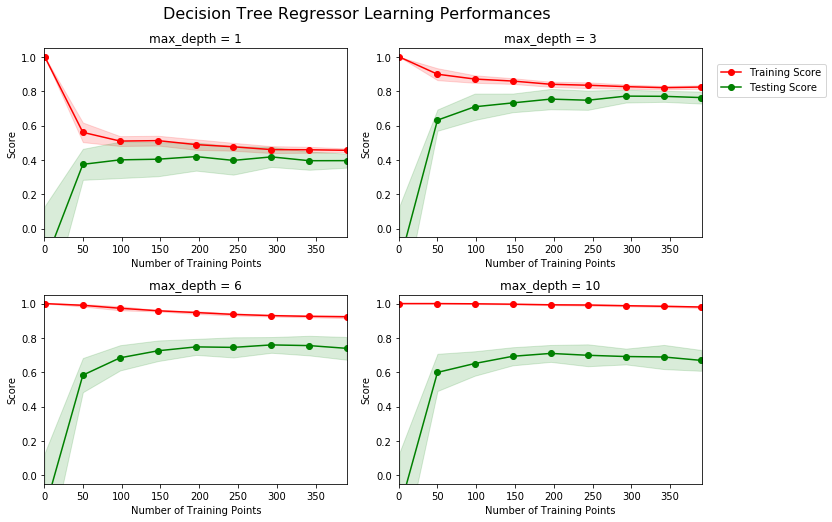

In [52]:
# Learning curves

vs.ModelLearning(features, prices)

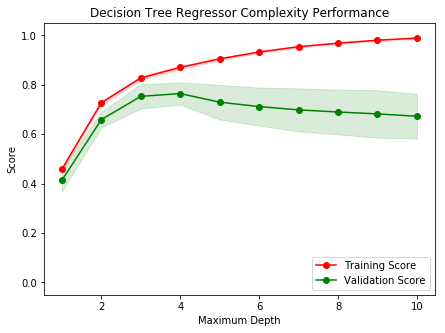

In [53]:
# Complexity Curves

vs.ModelComplexity(X_train, y_train)

In [55]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import make_scorer

from sklearn.grid_search import GridSearchCV


C:\Users\jiliu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jiliu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [95]:
def fit_model(X, y):
    
    '''
    Performs grid search over the 'max_depth' parameter for a decision tree regressor trained on the input data [X, y]
    
    '''
    # Create cross-validation sets from the training data
    #cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()
    
    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': np.arange(1, 11)} 
    
    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    
    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, param_grid = params, scoring = scoring_fnc, cv = 5)
    
    # Fit the grid search object to the data to compute the optimal model
    grid.fit(X, y)

    return grid.best_estimator_
    

In [96]:
# fit the training data to the model using grid search

reg = fit_model(X_train, y_train)

reg

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [97]:
print("Paramater 'max_depth' is {} for the optimal model.".format(reg.get_params()["max_depth"]))

Paramater 'max_depth' is 4 for the optimal model.


In [98]:
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


In [103]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $411,000.00
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $20,959.06
